In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## If using PyCharm confirm your CWD
PyCharm uses the project's root dir, not the notebook file's dir unless configured differently. I will configure the CWD in PyCharm to match the ipynb files to be consistent with Jupyter's default. Bug tracked [here](https://intellij-support.jetbrains.com/hc/en-us/community/posts/115000551684-Jupyter-Notebook-default-working-directory).


In [2]:
os.getcwd()

'/Users/joeselvik/projects/python/machine-learning-coursera/linear-regression'

## Load and examine the data set.

In [3]:
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 0, 'Population of City in 10,000s')

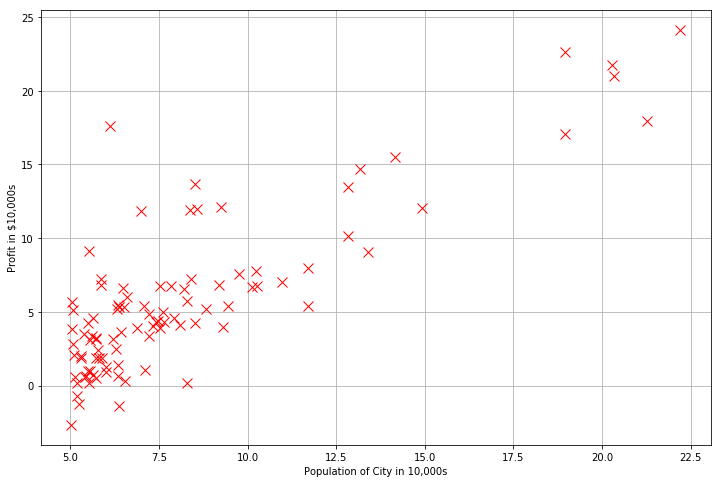

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(data.iloc[:, 0].values, data.iloc[:, 1].values, 'rx', markersize=10)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

## Modify the pandas data frame
To work with the python and math!


### First insert a column of 1s at the beginning of the data frame
Each row in the data frame is a specific training example. Add a first column of 1s to account for theta0.

In [7]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### Second, separate data into independent variables X and our dependent variable y
The target value y depends on values in X. If there's more than one independent variable this becomes multiple variable linear regression.

In [8]:
cols = data.shape[1]           # data is 97x3, shape[1] is 3
X = data.iloc[:, 0:cols-1]     # training data, use indexing location (iloc) for all rows, 2 columns
y = data.iloc[:, cols-1:cols]  # target value, all rows, column 3

X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


### Third, convert data frames to numpy matrices and instantiate a parameter matirx
The parameter matrix, theta, is what gets modified until the cost function in minimized.

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))  # parameter matrix

print("Dimensions")
print("X:", X.shape, "y:", y.shape, "theta:", theta.shape)

Dimensions
X: (97, 2) y: (97, 1) theta: (1, 2)


## Cost function
Matlab vectorized solution...

`J = 1 / (2 * m) * sum(((X * theta) - y).^2);`

Use numpy's linear algebra capabilities to compute the result as a series of matrix operations.

In [11]:
def computeCost(X, y, theta):
    """Find the total cost with given theta values over every training example.
    
    :param numpy.matrixlib.defmatrix.matrix X: np matrix of training data
    :param numpy.matrixlib.defmatrix.matrix y: np matrix of target values
    :param numpy.ndarray theta: np matrix of parameter values
    
    :rtype: numpy.float64
    :return: Total cost of theta values on training data
    """
    inner = np.power(((X * theta.T) - y), 2)  # compute a series of matrix operations
    return np.sum(inner) / (2 * len(X))       # len(X), a vector, is 97


Initial error before optimizing theta parameters

In [12]:
computeCost(X, y, theta)

32.072733877455676

## Gradient Descent
Optimization technique to find parameters theta.

### Initialize variables for learning rate and iterations
Alpha is the learning rate, a factor in the update rule for the parameters that helps determine how quickly the algorithm will converge to the optimal solution.


In [13]:
alpha = 0.01  
iters = 1000

In [14]:

def gradientDescent(X, y, theta, alpha, iters):
    """Performs the Gradient Descent algorithm.
    
    For each iteration compute the gradient of the error term in order to figure out
    the appropriate direction to move the parameter vector.
    
    Calculates the changes to make to parameters in order to reduce the error, thus
    bringing the solution closer to the optimal solution.
    
    .. todo: Not optimal, get rid of that inner loop and update all of the parameters at once
    
    :param numpy.matrixlib.defmatrix.matrix X: np matrix of training data
    :param numpy.matrixlib.defmatrix.matrix y: np matrix of target values
    :param numpy.matrixlib.defmatrix.matrix theta: np matrix of parameter values
    :param float alpha: learning rate
    :param int iters: number of iterations to perform
    
    :rtype: tuple(numpy.matrixlib.defmatrix.matrix, numpy.ndarray)
    :return: vector with optimized theta values and a vector of costs found while 'descending'
    """
    temp = np.matrix(np.zeros(theta.shape))   # 1x2 zero matrix to simultaneously update theta_j
    parameters = int(theta.ravel().shape[1])  # ravel flattens the matrix, shape[1] is 2
    cost = np.zeros(iters)                    # vector to store each cost calculated for every iter 
    
    for i in range(iters):
        # h(x) - y
        error = (X * theta.T) - y  # 97x2 * 2x1 - 91x1 = 97x1 matrix

        # solve for updated theta_j values, save in temp
        for j in range(parameters):
            # term is the contents of the summation, a 97 element vector
            term = np.multiply(error, X[:, j])  # 97x1 .* a column (97x1)
            
            # compute the gradient
            # old theta - alpha*(1/m) * sum of every term
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))

        # save new values of theta, compute and save their new cost
        theta = temp
        cost[i] = computeCost(X, y, theta)

    # return final theta values and a history of cost found to get to final theta values
    # cost should decrease, if not try modifying alpha
    return theta, cost


### Perform gradient descent to "fit" the model parameters
g is a vector of optimal theta values

In [15]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g

matrix([[-3.24140214,  1.1272942 ]])

Total error of the linear regression model

In [16]:
computeCost(X, y, g) 

4.515955503078912

## View the results
Overlay a line representing our model on top of a scatter plot of the data to see how well it fits.

Use numpy's "linspace" function to create an evenly-spaced series of points within the range of our data, and then "evaluate" those points using our model to see what the expected profit would be. Turn this into a line graph and plot it.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

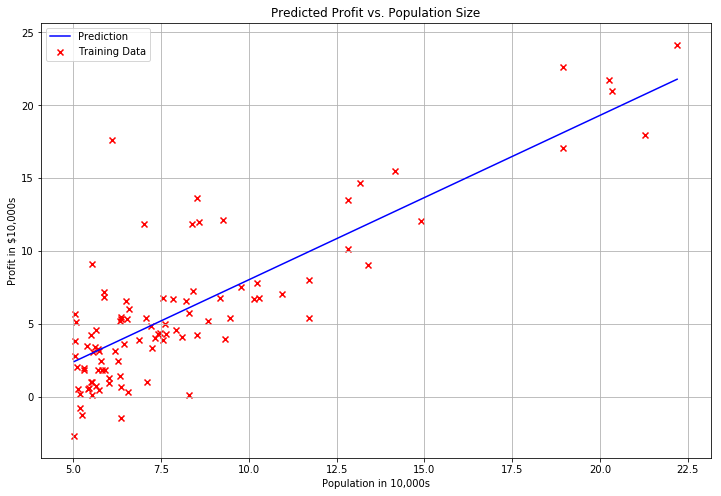

In [17]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)

# h(x) = theta0 + theta1 * x
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.grid(True)
ax.plot(x, f, 'b', label='Prediction')
ax.scatter(data.Population, data.Profit, c='r', marker='x', label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')

### View cost at each iteration of Gradient Decsent
gradientDescent() also outputs a vector with the cost at each training iteration, graph it.

This should be a convex optimization problem, where cost always decreases.

Text(0.5, 1.0, 'Error vs. Training Epoch')

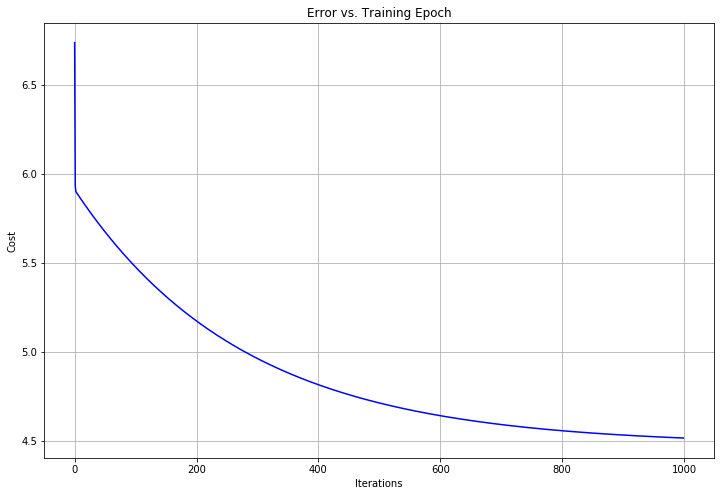

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.grid(True)
ax.plot(np.arange(iters), cost, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [20]:
theta

matrix([[0, 0]])

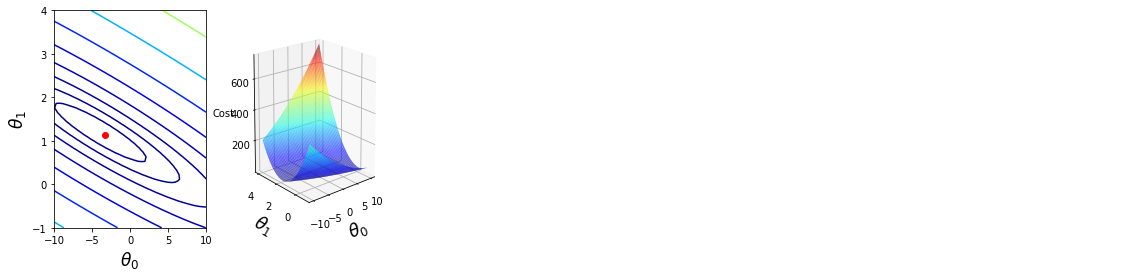

In [28]:
from mpl_toolkits.mplot3d import axes3d

# Create the grid coordinates
theta0_range = np.linspace(-10, 10, 50)
theta1_range = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(theta0_range, theta1_range, indexing='xy')
Z = np.zeros((theta0_range.size, theta1_range.size))

# Calculate Z-values (Cost) for everything in grid
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = computeCost(X, y, np.matrix([xx[i, j], yy[i, j]]))

# Start plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(g[0, 0], g[0, 1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# settings for both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)